In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
db_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INF 2178/Data/diabetes.csv', header = 0, engine = 'c')
db_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
db_df['Outcome'] = db_df['Outcome'].astype('bool')
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


In [5]:
db_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000                  0.243750   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

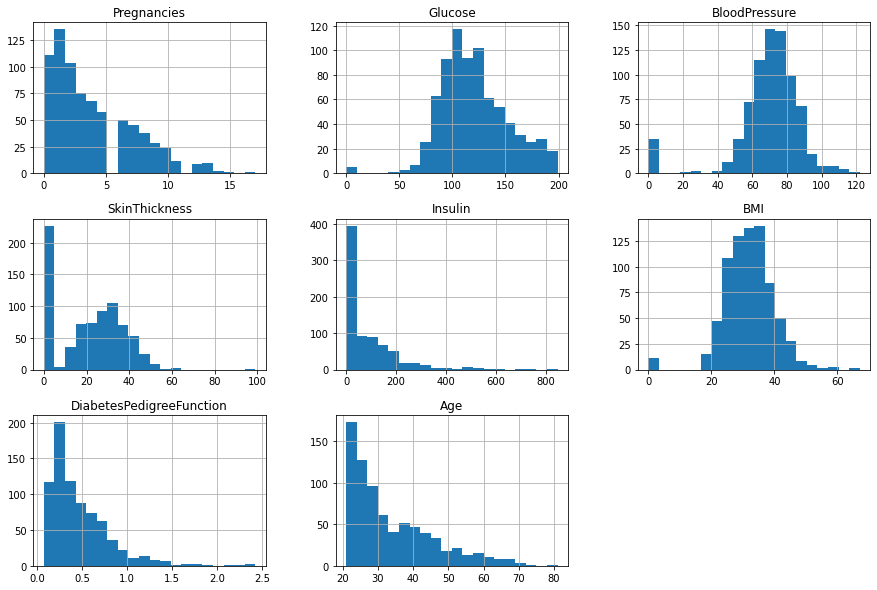

In [6]:
db_df.hist(bins=20, figsize=(15,10))
plt.show()

### Anomaly Detection for Pregnancies Column

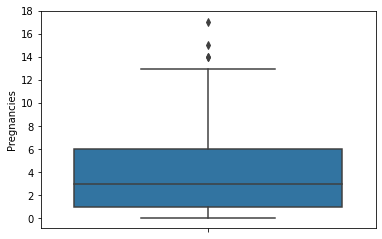

In [7]:
sns.boxplot(y = 'Pregnancies', data=db_df)
#plt.title('Distribution of # of Pregnancies')
plt.yticks(range(0,20,2))
plt.show()

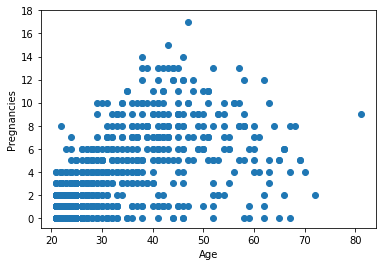

In [8]:
plt.scatter(db_df['Age'], db_df['Pregnancies'])
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.yticks(range(0,20,2))
plt.show()

In [9]:
def age_group(x):
  if x <= 24:
    age_group = '21-24'
  elif (x > 24) & (x <=29):
    age_group = '25-29'
  elif (x > 29) & (x <=34):
    age_group = '30-34'
  elif (x >34) & (x <=39):
    age_group = '35-39'
  elif (x > 39) & (x <=44):
    age_group = '40-44'
  elif (x > 44) & (x <= 49):
    age_group = '45-49'
  else:
    age_group = '50+'
  return age_group

db_df['AgeGroup'] = db_df['Age'].apply(lambda x: age_group(x))
db_df['AgeGroup'] = pd.Categorical(db_df['AgeGroup'], ["21-24", "25-29", "30-34",'35-39','40-44','45-49','50+'])

In [10]:
db_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome AgeGroup  
0                     0.627   50     True      50+  
1                     0.351   31    False    30-34  
2                     0.672   32     True    30-34  
3                     0.167   21    False    21-24  
4                     2.288   33     True    30-34

([<matplotlib.axis.YTick at 0x7ff418c72f90>,
 <a list of 10 Text major ticklabel objects>)

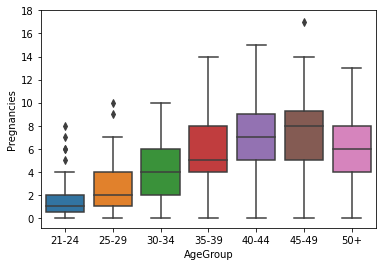

In [11]:
sns.boxplot(x='AgeGroup', y='Pregnancies', data=db_df)
plt.yticks(range(0,20,2))
#plt.title('# of Pregnancies by Age Group')

Text(0.5, 1.0, '# of Pregnancies by Age Group')

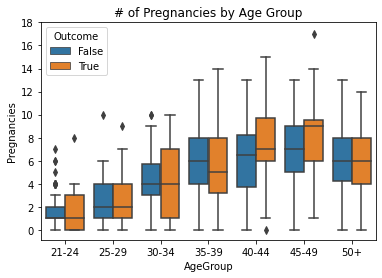

In [12]:
sns.boxplot(x='AgeGroup', y='Pregnancies', hue='Outcome', data=db_df)
plt.yticks(range(0,20,2))
plt.title('# of Pregnancies by Age Group')

In [13]:
db_df[db_df['Pregnancies']==8]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2              8      183             64              0        0  23.3   
9              8      125             96              0        0   0.0   
21             8       99             84              0        0  35.4   
53             8      176             90             34      300  33.7   
61             8      133             72              0        0  32.9   
111            8      155             62             26      495  34.0   
133            8       84             74             31        0  38.3   
154            8      188             78              0        0  47.9   
175            8      179             72             42      130  32.7   
186            8      181             68             36      495  30.1   
188            8      109             76             39      114  27.9   
194            8       85             55             20        0  24.4   
206            8      196             76             29      280  37.5   
299            8      112             72              0        0  23.6   
330            8      118             72             19        0  23.1   
344            8       95             72              0        0  36.8   
345            8      126             88             36      108  38.5   
387            8      105            100             36        0  43.3   
408            8      197             74              0        0  25.9   
424            8      151             78             32      210  42.9   
443            8      108             70              0        0  30.5   
462            8       74             70             40       49  35.3   
468            8      120              0              0        0  30.0   
478            8      126             74             38       75  25.9   
489            8      194             80              0        0  26.1   
509            8      120             78              0        0  25.0   
540            8      100             74             40      215  39.4   
545            8      186             90             35      225  34.5   
557            8      110             76              0        0  27.8   
583            8      100             76              0        0  38.7   
584            8      124             76             24      600  28.7   
586            8      143             66              0        0  34.9   
662            8      167            106             46      231  37.6   
674            8       91             82              0        0  35.6   
690            8      107             80              0        0  24.6   
731            8      120             86              0        0  28.4   
737            8       65             72             23        0  32.0   
754            8      154             78             32        0  32.4   

     DiabetesPedigreeFunction  Age  Outcome AgeGroup  
2                       0.672   32     True    30-34  
9                       0.232   54     True      50+  
21                      0.388   50    False      50+  
53                      0.467   58     True      50+  
61                      0.270   39     True    35-39  
111                     0.543   46     True    45-49  
133                     0.457   39    False    35-39  
154                     0.137   43     True    40-44  
175                     0.719   36     True    35-39  
186                     0.615   60     True      50+  
188                     0.640   31     True    30-34  
194                     0.136   42    False    40-44  
206                     0.605   57     True      50+  
299                     0.840   58    False      50+  
330                     1.476   46    False    45-49  
344                     0.485   57    False      50+  
345                     0.349   49    False    45-49  
387                     0.239   45     True    45-49  
408                     1.191   39     True    35-39  
424               

#### Conclusion <br>
By breaking down # of pregnancies by age groups, the seemingly high anomalies are still plausible. During the period of data collection. In the 1980s, the fertlity rate among Native American communities was higher than that of white, black and asian communities. 

### Anomaly Detection for Glucose Column 

In [14]:
zero_pressure = str(round(len(db_df[db_df['BloodPressure'] == 0])/len(db_df),3)*100)
zero_skin = str(round(len(db_df[db_df['SkinThickness'] == 0])/len(db_df),3)*100)
zero_insulin = str(round(len(db_df[db_df['Insulin'] == 0])/len(db_df),3)*100)
zero_bmi = str(round(len(db_df[db_df['BMI'] == 0])/len(db_df),3)*100)
zero_function = str(round(len(db_df[db_df['DiabetesPedigreeFunction'] == 0])/len(db_df),3)*100)
zero_glu = str(round(len(db_df[db_df['Glucose'] == 0])/len(db_df),3)*100)

print('Diastolic blood pressure column has ', zero_pressure, '% of record being missing.')
print('Triceps skin fold thickness column has ',zero_skin,'% of record being missing.')
print('2-Hour serum insulin column has ',zero_insulin,'% of record being missing.')
print('BMI column has ',zero_bmi,'% of record being missing.')
print('Diabetes pedigree function column has ',zero_function,'% of record being missing.')
print('Glucose column has ',zero_glu,'% of record being missing.')

Diastolic blood pressure column has  4.6 % of record being missing.
Triceps skin fold thickness column has  29.599999999999998 % of record being missing.
2-Hour serum insulin column has  48.699999999999996 % of record being missing.
BMI column has  1.4000000000000001 % of record being missing.
Diabetes pedigree function column has  0.0 % of record being missing.
Glucose column has  0.7000000000000001 % of record being missing.


Text(0.5, 1.0, 'Distribution of 2-hour Postload Glucose')

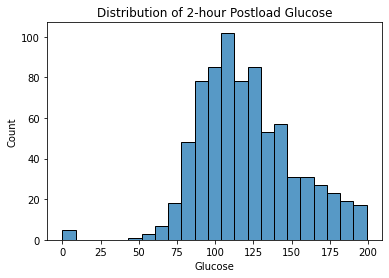

In [15]:
sns.histplot(db_df['Glucose'])
plt.title('Distribution of 2-hour Postload Glucose')

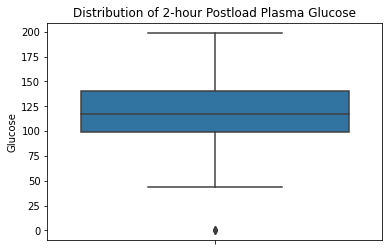

In [16]:
sns.boxplot(y = 'Glucose', data=db_df)
plt.title('Distribution of 2-hour Postload Plasma Glucose')
plt.show()

#### Conclusion <br>
From boxplot, histogram and understanding of this column, 0 would be an anomaly in the dataset that needs to be removed, becuase it is not a possible value.<br>
5 out of original 768 rows are removed due to having Glucose value euqals to 0.

In [17]:
db_df = db_df[db_df['Glucose'] > 0]
db_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               763 non-null    int64   
 1   Glucose                   763 non-null    int64   
 2   BloodPressure             763 non-null    int64   
 3   SkinThickness             763 non-null    int64   
 4   Insulin                   763 non-null    int64   
 5   BMI                       763 non-null    float64 
 6   DiabetesPedigreeFunction  763 non-null    float64 
 7   Age                       763 non-null    int64   
 8   Outcome                   763 non-null    bool    
 9   AgeGroup                  763 non-null    category
dtypes: bool(1), category(1), float64(2), int64(6)
memory usage: 55.5 KB


### Diastolic Blood Pressure Anomoly Detection

Text(0.5, 1.0, 'Distribution of Diastolic Blood Pressure')

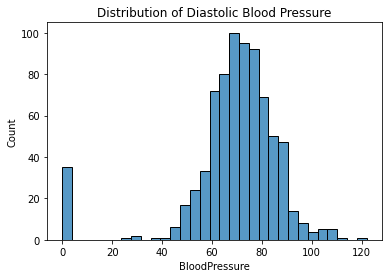

In [18]:
sns.histplot(db_df['BloodPressure'])
plt.title('Distribution of Diastolic Blood Pressure')

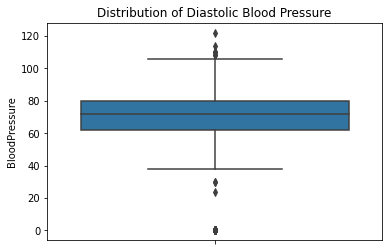

In [19]:
sns.boxplot(y = 'BloodPressure', data=db_df)
plt.title('Distribution of Diastolic Blood Pressure')
plt.show()

In [20]:
db_df[db_df['BloodPressure'] == 0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10      115              0              0        0  35.3   
15             7      100              0              0        0  30.0   
49             7      105              0              0        0   0.0   
60             2       84              0              0        0   0.0   
78             0      131              0              0        0  43.2   
81             2       74              0              0        0   0.0   
172            2       87              0             23        0  28.9   
193           11      135              0              0        0  52.3   
222            7      119              0              0        0  25.2   
261            3      141              0              0        0  30.0   
266            0      138              0              0        0  36.3   
269            2      146              0              0        0  27.5   
300            0      167              0              0        0  32.3   
332            1      180              0              0        0  43.3   
336            0      117              0              0        0  33.8   
347            3      116              0              0        0  23.5   
357           13      129              0             30        0  39.9   
426            0       94              0              0        0   0.0   
430            2       99              0              0        0  22.2   
435            0      141              0              0        0  42.4   
453            2      119              0              0        0  19.6   
468            8      120              0              0        0  30.0   
484            0      145              0              0        0  44.2   
494            3       80              0              0        0   0.0   
522            6      114              0              0        0   0.0   
533            6       91              0              0        0  29.8   
535            4      132              0              0        0  32.9   
589            0       73              0              0        0  21.1   
601            6       96              0              0        0  23.7   
604            4      183              0              0        0  28.4   
619            0      119              0              0        0  32.4   
643            4       90              0              0        0  28.0   
697            0       99              0              0        0  25.0   
703            2      129              0              0        0  38.5   
706           10      115              0              0        0   0.0   

     DiabetesPedigreeFunction  Age  Outcome AgeGroup  
7                       0.134   29    False    25-29  
15                      0.484   32     True    30-34  
49                      0.305   24    False    21-24  
60                      0.304   21    False    21-24  
78                      0.270   26     True    25-29  
81                      0.102   22    False    21-24  
172                     0.773   25    False    25-29  
193                     0.578   40     True    40-44  
222                     0.209   37    False    35-39  
261                     0.761   27     True    25-29  
266                     0.933   25     True    25-29  
269                     0.240   28     True    25-29  
300                     0.839   30     True    30-34  
332                     0.282   41     True    40-44  
336                     0.932   44    False    40-44  
347                     0.187   23    False    21-24  
357                     0.569   44     True    40-44  
426                     0.256   25    False    25-29  
430                     0.108   23    False    21-24  
435                     0.205   29     True    25-29  
453                     0.832   72    False      50+  
468                     0.183   38     True    35-39  
484                     0.630   31     True    30-34  
494                 

In [21]:
db_df[db_df['BMI'] == 0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
9              8      125             96              0        0  0.0   
49             7      105              0              0        0  0.0   
60             2       84              0              0        0  0.0   
81             2       74              0              0        0  0.0   
145            0      102             75             23        0  0.0   
371            0      118             64             23       89  0.0   
426            0       94              0              0        0  0.0   
494            3       80              0              0        0  0.0   
522            6      114              0              0        0  0.0   
684            5      136             82              0        0  0.0   
706           10      115              0              0        0  0.0   

     DiabetesPedigreeFunction  Age  Outcome AgeGroup  
9                       0.232   54     True      50+  
49                      0.305   24    False    21-24  
60                      0.304   21    False    21-24  
81                      0.102   22    False    21-24  
145                     0.572   21    False    21-24  
371                     1.731   21    False    21-24  
426                     0.256   25    False    25-29  
494                     0.174   22    False    21-24  
522                     0.189   26    False    25-29  
684                     0.640   69    False      50+  
706                     0.261   30     True    30-34

### Drop High Zero Columns

In [22]:
db_df = db_df[['Pregnancies','Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age','Outcome','AgeGroup']]
db_df.head()

Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age  \
0            6      148             72  33.6                     0.627   50   
1            1       85             66  26.6                     0.351   31   
2            8      183             64  23.3                     0.672   32   
3            1       89             66  28.1                     0.167   21   
4            0      137             40  43.1                     2.288   33   

   Outcome AgeGroup  
0     True      50+  
1    False    30-34  
2     True    30-34  
3    False    21-24  
4     True    30-34

In [23]:
db_df[db_df['BMI'] == 0]

Pregnancies  Glucose  BloodPressure  BMI  DiabetesPedigreeFunction  Age  \
9              8      125             96  0.0                     0.232   54   
49             7      105              0  0.0                     0.305   24   
60             2       84              0  0.0                     0.304   21   
81             2       74              0  0.0                     0.102   22   
145            0      102             75  0.0                     0.572   21   
371            0      118             64  0.0                     1.731   21   
426            0       94              0  0.0                     0.256   25   
494            3       80              0  0.0                     0.174   22   
522            6      114              0  0.0                     0.189   26   
684            5      136             82  0.0                     0.640   69   
706           10      115              0  0.0                     0.261   30   

     Outcome AgeGroup  
9       True      50+  
49     False    21-24  
60     False    21-24  
81     False    21-24  
145    False    21-24  
371    False    21-24  
426    False    25-29  
494    False    21-24  
522    False    25-29  
684    False      50+  
706     True    30-34

In [24]:
db_df = db_df[db_df['BloodPressure'] > 0]

In [25]:
zero_bmi = str(round(len(db_df[db_df['BMI'] == 0])/len(db_df),3)*100)
zero_function = str(round(len(db_df[db_df['DiabetesPedigreeFunction'] == 0])/len(db_df),3)*100)
print('BMI column has ',zero_bmi,'% of record being missing.')
print('Diabetes pedigree function column has ',zero_function,'% of record being missing.')

BMI column has  0.5 % of record being missing.
Diabetes pedigree function column has  0.0 % of record being missing.


In [26]:
db_df = db_df[db_df['BMI'] > 0]
db_df.describe()

Pregnancies     Glucose  BloodPressure         BMI  \
count   724.000000  724.000000     724.000000  724.000000   
mean      3.866022  121.882597      72.400552   32.467127   
std       3.362803   30.750030      12.379870    6.888941   
min       0.000000   44.000000      24.000000   18.200000   
25%       1.000000   99.750000      64.000000   27.500000   
50%       3.000000  117.000000      72.000000   32.400000   
75%       6.000000  142.000000      80.000000   36.600000   
max      17.000000  199.000000     122.000000   67.100000   

       DiabetesPedigreeFunction         Age  
count                724.000000  724.000000  
mean                   0.474765   33.350829  
std                    0.332315   11.765393  
min                    0.078000   21.000000  
25%                    0.245000   24.000000  
50%                    0.379000   29.000000  
75%                    0.627500   41.000000  
max                    2.420000   81.000000

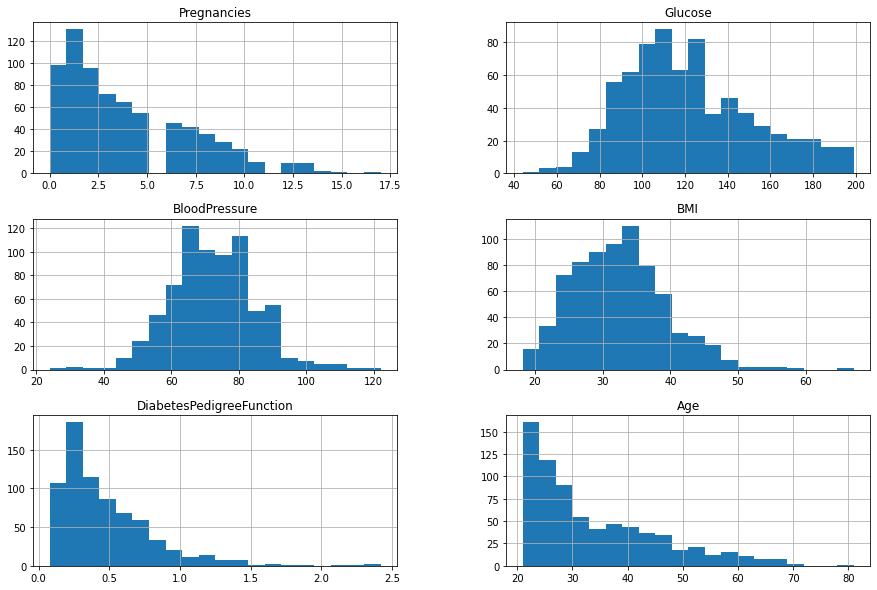

In [27]:
db_df.hist(bins=20, figsize=(15,10))
plt.show()

In [28]:
db_df.describe()

Pregnancies     Glucose  BloodPressure         BMI  \
count   724.000000  724.000000     724.000000  724.000000   
mean      3.866022  121.882597      72.400552   32.467127   
std       3.362803   30.750030      12.379870    6.888941   
min       0.000000   44.000000      24.000000   18.200000   
25%       1.000000   99.750000      64.000000   27.500000   
50%       3.000000  117.000000      72.000000   32.400000   
75%       6.000000  142.000000      80.000000   36.600000   
max      17.000000  199.000000     122.000000   67.100000   

       DiabetesPedigreeFunction         Age  
count                724.000000  724.000000  
mean                   0.474765   33.350829  
std                    0.332315   11.765393  
min                    0.078000   21.000000  
25%                    0.245000   24.000000  
50%                    0.379000   29.000000  
75%                    0.627500   41.000000  
max                    2.420000   81.000000

### Transform to categorical variables

The 2-hour post load glucose are broken down into 2 categorie:<br>


*   Normal: <140mg/dL
*   High: >=140mg/dL<br>

Cite: <br>
https://academic.oup.com/jcem/article/104/2/539/5098353




In [29]:
db_cat = db_df.copy()

In [30]:
db_cat['Outcome']=db_cat['Outcome'].replace({True:'Diab',False:'Non-Diab'})
db_df['Outcome']=db_df['Outcome'].replace({True:'Diab',False:'Non-Diab'})

In [31]:
db_cat['Glucose'] = db_cat['Glucose'].apply(lambda x: 'Normal' if x <140 else 'High')
db_cat['Glucose'] = pd.Categorical(db_cat['Glucose'],['Normal','High'])
db_cat.head()

Pregnancies Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age  \
0            6    High             72  33.6                     0.627   50   
1            1  Normal             66  26.6                     0.351   31   
2            8    High             64  23.3                     0.672   32   
3            1  Normal             66  28.1                     0.167   21   
4            0  Normal             40  43.1                     2.288   33   

    Outcome AgeGroup  
0      Diab      50+  
1  Non-Diab    30-34  
2      Diab    30-34  
3  Non-Diab    21-24  
4      Diab    30-34

Diastolic blood pressure are broken down into 5 categories:


*   Hypotension: <60mmHg
*   Normal: >=60 & <80mmHg
*   Hypertension1: >=80 & <90mmHg
*   Hypertension2: >=90 & <120mmHg
*   HypertensiveCrisis: >=120mmHg

Cite: <br>
https://www.webmd.com/hypertension-high-blood-pressure/guide/diastolic-and-systolic-blood-pressure-know-your-numbers <br>
https://www.webmd.com/heart/understanding-low-blood-pressure-basics



In [32]:
def getBPcat(x):
  if x <60:
    BP_cat='Hypotension'
  elif (x>=60)&(x<80):
    BP_cat='Normal'
  elif (x>=80)&(x<90):
    BP_cat='Hypertension1'
  elif (x>=90)&(x<120):
    BP_cat='Hypertension2'
  else:
    BP_cat='HypertensiveCrisis'
  return BP_cat

In [33]:
db_cat['BloodPressure']=db_cat['BloodPressure'].apply(lambda x: getBPcat(x))
db_cat['BloodPressure']=pd.Categorical(db_cat['BloodPressure'],['Hypotension','Normal','Hypertension1','Hypertension2','HypertensiveCrisis'])
db_cat.head()

Pregnancies Glucose BloodPressure   BMI  DiabetesPedigreeFunction  Age  \
0            6    High        Normal  33.6                     0.627   50   
1            1  Normal        Normal  26.6                     0.351   31   
2            8    High        Normal  23.3                     0.672   32   
3            1  Normal        Normal  28.1                     0.167   21   
4            0  Normal   Hypotension  43.1                     2.288   33   

    Outcome AgeGroup  
0      Diab      50+  
1  Non-Diab    30-34  
2      Diab    30-34  
3  Non-Diab    21-24  
4      Diab    30-34

BMI are broken down into 4 categories:


* Underweight: <18.5
* Normal weight: >=18.5 & <24.9
* Overweight: >=24.9 & <29.9
* Obese: >=29.9

Cite: <br>
https://www.cancer.org/cancer/cancer-causes/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html

In [34]:
def getBMIcat(x):
  if x <18.5:
    bmicat='Underweight'
  elif (x>=18.5)&(x<24.9):
    bmicat='Normal'
  elif (x>=24.9)&(x<29.9):
    bmicat='Overweight'
  elif (x>=29.9):
    bmicat='Obese'
  return bmicat

In [35]:
db_cat['BMI']=db_cat['BMI'].apply(lambda x: getBMIcat(x))
db_cat['BMI']=pd.Categorical(db_cat['BMI'], ['Underweight','Normal','Overweight','Obese'])
db_cat.head()

Pregnancies Glucose BloodPressure         BMI  DiabetesPedigreeFunction  \
0            6    High        Normal       Obese                     0.627   
1            1  Normal        Normal  Overweight                     0.351   
2            8    High        Normal      Normal                     0.672   
3            1  Normal        Normal  Overweight                     0.167   
4            0  Normal   Hypotension       Obese                     2.288   

   Age   Outcome AgeGroup  
0   50      Diab      50+  
1   31  Non-Diab    30-34  
2   32      Diab    30-34  
3   21  Non-Diab    21-24  
4   33      Diab    30-34

### Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


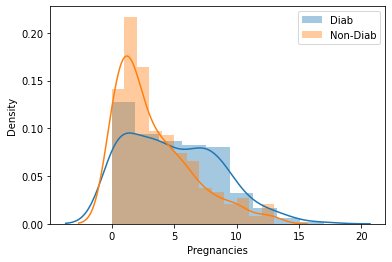

In [36]:
sns.distplot(db_df[db_df['Outcome']=='Diab']['Pregnancies'], label='Diab')
sns.distplot(db_df[db_df['Outcome']=='Non-Diab']['Pregnancies'], label='Non-Diab')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


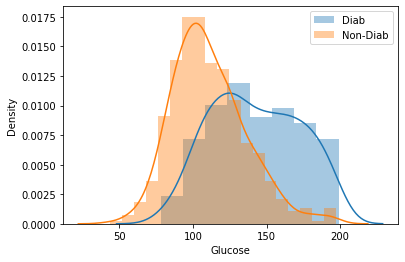

In [37]:
sns.distplot(db_df[db_df['Outcome']=='Diab']['Glucose'], label='Diab')
sns.distplot(db_df[db_df['Outcome']=='Non-Diab']['Glucose'], label='Non-Diab')
plt.legend()
plt.show()

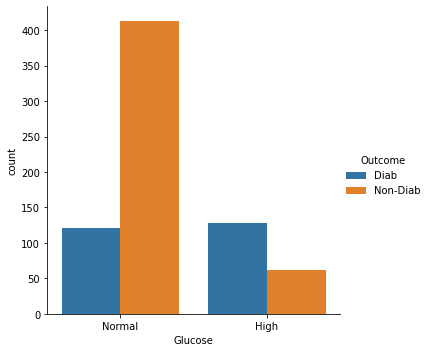

In [38]:
sns.catplot(x='Glucose',kind='count',hue='Outcome',data=db_cat)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


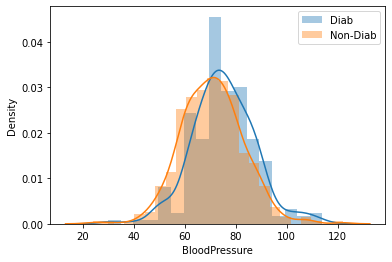

In [39]:
sns.distplot(db_df[db_df['Outcome']=='Diab']['BloodPressure'], label='Diab')
sns.distplot(db_df[db_df['Outcome']=='Non-Diab']['BloodPressure'], label='Non-Diab')
plt.legend()
plt.show()

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

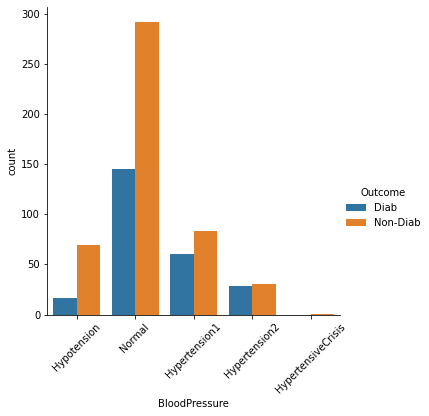

In [40]:
sns.catplot(x='BloodPressure',kind='count',hue='Outcome',data=db_cat)
plt.xticks(rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


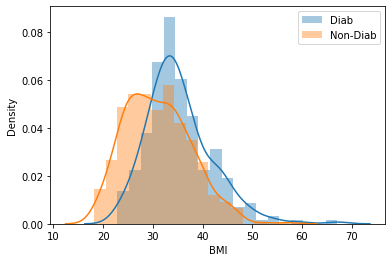

In [41]:
sns.distplot(db_df[db_df['Outcome']=='Diab']['BMI'], label='Diab')
sns.distplot(db_df[db_df['Outcome']=='Non-Diab']['BMI'], label='Non-Diab')
plt.legend()
plt.show()

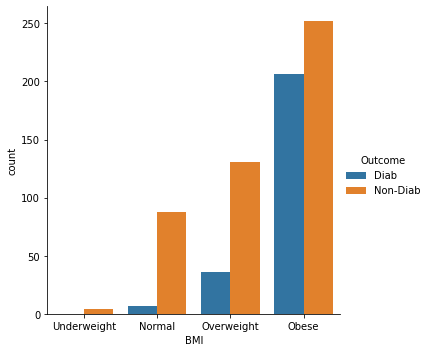

In [42]:
sns.catplot(x='BMI',kind='count',hue='Outcome',data=db_cat)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


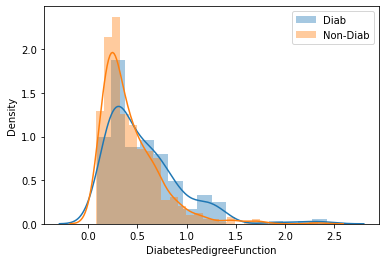

In [43]:
sns.distplot(db_df[db_df['Outcome']=='Diab']['DiabetesPedigreeFunction'], label='Diab')
sns.distplot(db_df[db_df['Outcome']=='Non-Diab']['DiabetesPedigreeFunction'], label='Non-Diab')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


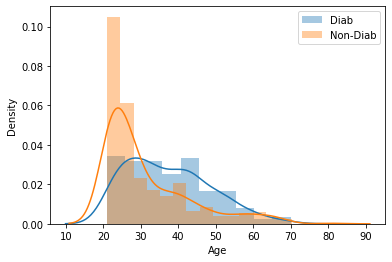

In [44]:
sns.distplot(db_df[db_df['Outcome']=='Diab']['Age'], label='Diab')
sns.distplot(db_df[db_df['Outcome']=='Non-Diab']['Age'], label='Non-Diab')
plt.legend()
plt.show()

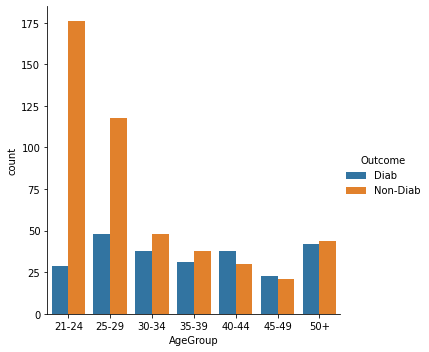

In [45]:
sns.catplot(x='AgeGroup',kind='count',hue='Outcome',data=db_cat)

### Multivariate Analysis

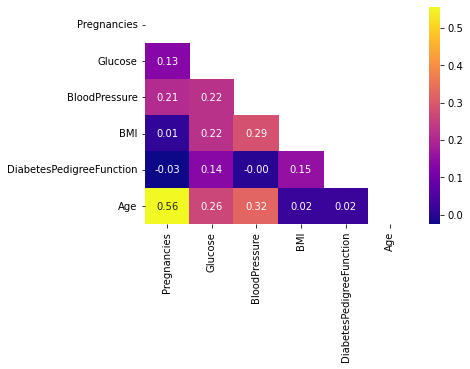

In [46]:
mask = np.triu(np.ones_like(db_df.corr(), dtype=bool))
sns.heatmap(db_df.corr(), mask=mask, fmt=".2f", annot=True, cmap='plasma')

<Figure size 720x480 with 0 Axes>

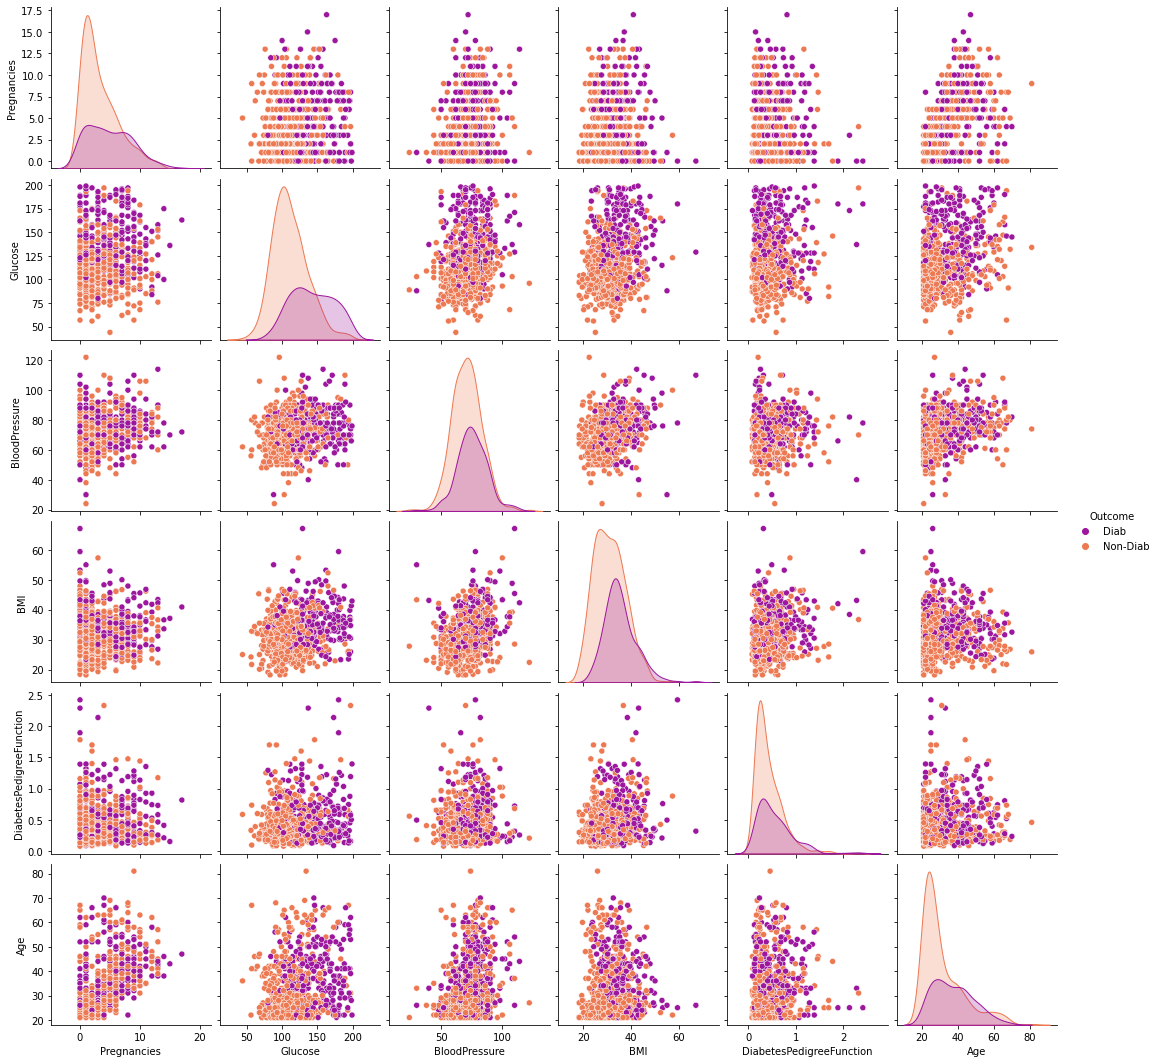

In [47]:
plt.figure(dpi = 120)
sns.pairplot(db_df,hue = 'Outcome',palette = 'plasma')
plt.show()

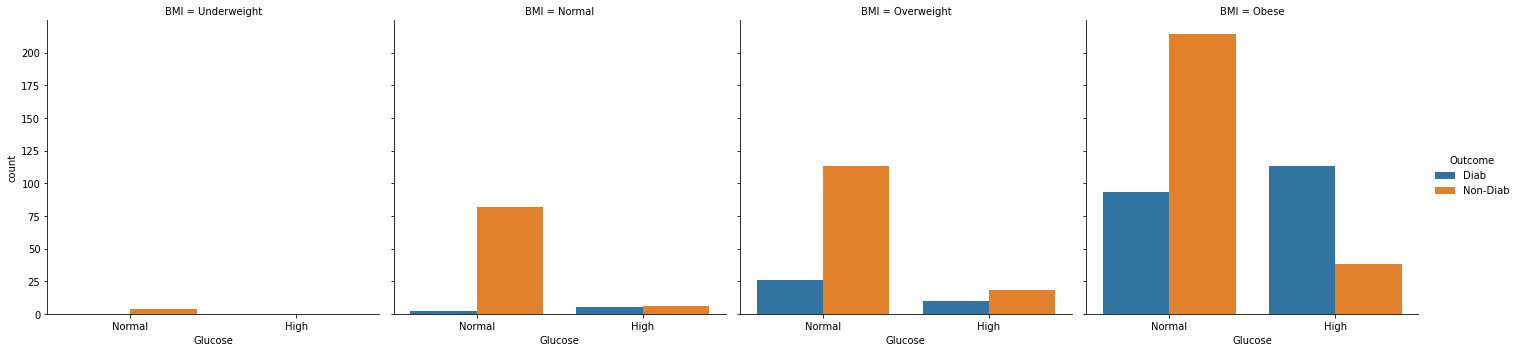

In [48]:
sns.catplot(x='Glucose',kind='count',hue='Outcome',col='BMI',data=db_cat)

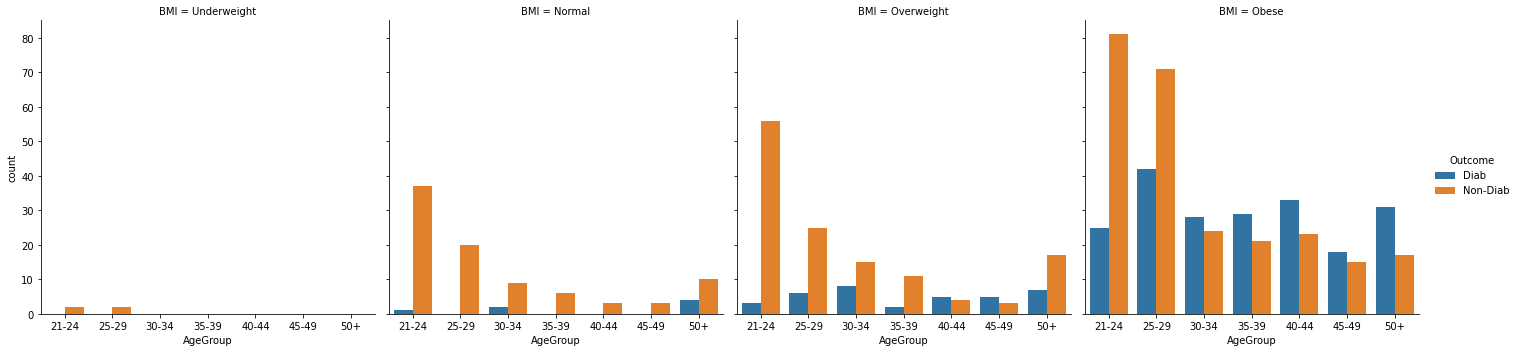

In [49]:
sns.catplot(x='AgeGroup',kind='count',hue='Outcome',col='BMI',data=db_cat)

### T-tests

#### RQ1: Does family history (Diabetes Pedigree Function) differs between groups with or without diabetes?`

Check if between groups with and without diabetes have equal variance. Use Levene test to examine if the 2 groups comes from population with same variance. The result is no.

In [50]:
dia_dpf = db_cat[db_cat['Outcome']=='Diab']['DiabetesPedigreeFunction']
ndia_dpf = db_cat[db_cat['Outcome']=='Non-Diab']['DiabetesPedigreeFunction']

**Check if the samples belongs to each group are normal distributed**<br>
From the below graphs, it could be observed that both groups are not distributed normally


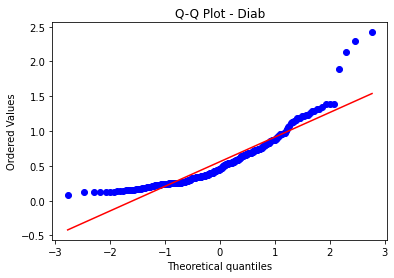

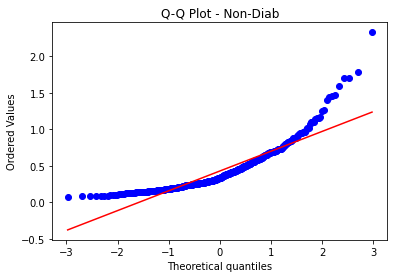

In [51]:
unique_db = db_cat['Outcome'].unique()
for db in unique_db :
    stats.probplot(db_cat[db_cat['Outcome'] == db]['DiabetesPedigreeFunction'], dist="norm", plot=plt)
    plt.title("Q-Q Plot - " +  db)
    plt.show()

**Check if the 2 groups have the same variabce**<br>
From Levene's test, it could be concluded that the variances between these 2 groups are not equal.

In [52]:
stat_lev, p_lev = stats.levene(dia_dpf, ndia_dpf)
p_lev

0.00034951685701371365

In [53]:
stat_lev

12.90728594218576

Under such circumstance, the Mann-Whitney U Test should be performed.

In [54]:
stats.mannwhitneyu(dia_dpf, ndia_dpf)

MannwhitneyuResult(statistic=72240.0, pvalue=9.518763014197694e-07)

From the small p-value, we could reject the null hypothesis. Family history, professed by Diabetes Pedigree Function value, is different between the 2 groups of study.

#### RQ2: Does number of preganacies differs between groups with or without diabetes?

In [55]:
dia_preg = db_cat[db_cat['Outcome']=='Diab']['Pregnancies']
ndia_preg = db_cat[db_cat['Outcome']=='Non-Diab']['Pregnancies']

**Check if the samples belongs to each group are normal distributed**<br>
From the below graphs, it could be observed that both groups are not distributed normally

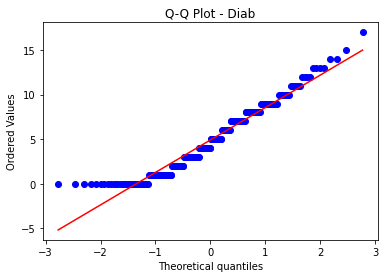

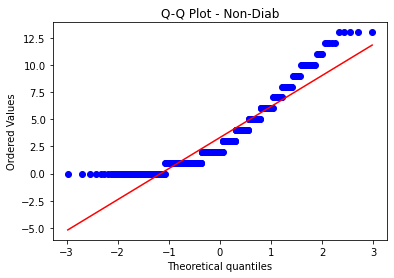

In [56]:
unique_db = db_cat['Outcome'].unique()
for db in unique_db :
    stats.probplot(db_cat[db_cat['Outcome'] == db]['Pregnancies'], dist="norm", plot=plt)
    plt.title("Q-Q Plot - " +  db)
    plt.show()

**Check if the 2 groups have the same variabce**<br>
From Levene's test, it could be concluded that the variances between these 2 groups are not equal.

In [57]:
stat_lev, p_lev = stats.levene(dia_preg, ndia_preg)
p_lev

1.3514028767819e-05

In [58]:
stat_lev

19.20048213989081

In [59]:
stats.mannwhitneyu(dia_preg, ndia_preg)

MannwhitneyuResult(statistic=73786.0, pvalue=3.441154785196536e-08)

From the small p-value, we could reject the null hypothesis. Number of pregnancies is different between the 2 groups of study.

#### RQ3: Does blood pressure differs between groups with or without diabetes?




In [60]:
dia_bp = db_df[db_df['Outcome']=='Diab']['BloodPressure']
ndia_bp = db_df[db_df['Outcome']=='Non-Diab']['BloodPressure']

**Check if the samples belongs to each group are normal distributed**<br>
From the below graphs, it could be observed that both groups are distributed normally

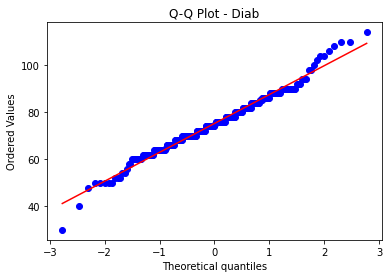

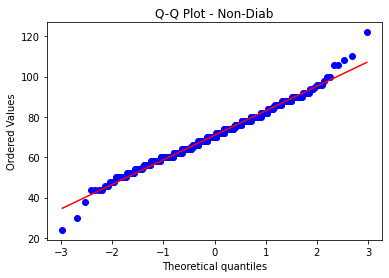

In [61]:
unique_db = db_df['Outcome'].unique()
for db in unique_db :
    stats.probplot(db_df[db_df['Outcome'] == db]['BloodPressure'], dist="norm", plot=plt)
    plt.title("Q-Q Plot - " +  db)
    plt.show()

**Check if the 2 groups have the same variabce**<br>
From Levene's test, it could be concluded that the variances between these 2 groups are equal.

In [62]:
stat_lev, p_lev = stats.levene(dia_bp, ndia_bp)
p_lev

0.870149640057206

In [63]:
stat_lev

0.02674092962110474

In [64]:
stats.ttest_ind(dia_bp, ndia_bp, equal_var=True)

Ttest_indResult(statistic=4.542898991270062, pvalue=6.502037637948246e-06)

From the small p-value, we could reject the null hypothesis. Blood Pressure is different between the 2 groups of study.

### Multple Linear Regression



In [65]:
db_lmdf = db_cat.copy()
db_lmdf['Outcome'] = db_lmdf['Outcome'].replace({'Diab':1, 'Non-Diab':0})
db_lmdf.drop('Age',axis=1, inplace=True)
db_lmdf.head()

Pregnancies Glucose BloodPressure         BMI  DiabetesPedigreeFunction  \
0            6    High        Normal       Obese                     0.627   
1            1  Normal        Normal  Overweight                     0.351   
2            8    High        Normal      Normal                     0.672   
3            1  Normal        Normal  Overweight                     0.167   
4            0  Normal   Hypotension       Obese                     2.288   

   Outcome AgeGroup  
0        1      50+  
1        0    30-34  
2        1    30-34  
3        0    21-24  
4        1    30-34

In [66]:
db_lmnum = db_df.copy()
db_lmnum['Outcome'] = db_lmnum['Outcome'].replace({'Diab':1, 'Non-Diab':0})
db_lmnum.drop('AgeGroup',axis=1, inplace=True)
db_lmnum.head()

Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age  \
0            6      148             72  33.6                     0.627   50   
1            1       85             66  26.6                     0.351   31   
2            8      183             64  23.3                     0.672   32   
3            1       89             66  28.1                     0.167   21   
4            0      137             40  43.1                     2.288   33   

   Outcome  
0        1  
1        0  
2        1  
3        0  
4        1

In [67]:
from statsmodels.formula.api import ols

#### Regression with categorical data

In [68]:
model = ols('Outcome ~ Pregnancies + C(Glucose) + C(BloodPressure) + C(BMI) + DiabetesPedigreeFunction + C(AgeGroup)',
            data=db_lmdf)
db_lm = model.fit()
db_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     17.58
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           9.01e-42
Time:                        02:43:56   Log-Likelihood:                -367.12
No. Observations:                 724   AIC:                             768.2
Df Residuals:                     707   BIC:                             846.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -0.1343      0.211     -0.636      0.525      -0.549       0.280
C(Glucose)[T.High]                         0.3414      0.037      9.346      0.000       0.270       0.413
C(BloodPressure)[T.Normal]                 0.0180      0.050      0.362      0.717      -0.080       0.116
C(BloodPressure)[T.Hypertension1]          0.0189      0.058      0.325      0.746      -0.096       0.134
C(BloodPressure)[T.Hypertension2]          0.0382      0.073      0.524      0.600      -0.105       0.182
C(BloodPressure)[T.HypertensiveCrisis]     0.0446      0.412      0.108      0.914      -0.764       0.853
C(BMI)[T.Normal]                          -0.0318      0.209     -0.152      0.879      -0.441       0.378
C(BMI)[T.Overweight]                       0.0694      0.207      0.336      0.737      -0.337       0.476
C(BMI)[T.Obese]                            0.2149      0.206      1.045      0.296      -0.189       0.618
C(AgeGroup)[T.25-29]                       0.0781      0.043      1.796      0.073      -0.007       0.163
C(AgeGroup)[T.30-34]                       0.2014      0.056      3.608      0.000       0.092       0.311
C(AgeGroup)[T.35-39]                       0.1517      0.064      2.388      0.017       0.027       0.277
C(AgeGroup)[T.40-44]                       0.2375      0.067      3.539      0.000       0.106       0.369
C(AgeGroup)[T.45-49]                       0.2179      0.078      2.804      0.005       0.065       0.370
C(AgeGroup)[T.50+]                         0.1646      0.061      2.677      0.008       0.044       0.285
Pregnancies                                0.0076      0.006      1.289      0.198      -0.004       0.019
DiabetesPedigreeFunction                   0.1732      0.047      3.704      0.000       0.081       0.265
==============================================================================
Omnibus:                       33.406   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.641
Skew:                           0.367   Prob(JB):                     2.70e-06
Kurtosis:                       2.441   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Regression with numeric data

In [69]:
model_num = ols('Outcome ~ Pregnancies + Glucose + BloodPressure + BMI + DiabetesPedigreeFunction + Age',
            data=db_lmnum)
db_lm_num = model_num.fit()
db_lm_num.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     55.40
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           3.30e-56
Time:                        02:43:56   Log-Likelihood:                -350.48
No. Observations:                 724   AIC:                             715.0
Df Residuals:                     717   BIC:                             747.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.0067      0.105     -9.555      0.000      -1.213      -0.800
Pregnancies                  0.0199      0.005      3.776      0.000       0.010       0.030
Glucose                      0.0062      0.001     12.069      0.000       0.005       0.007
BloodPressure               -0.0012      0.001     -0.900      0.369      -0.004       0.001
BMI                          0.0138      0.002      6.011      0.000       0.009       0.018
DiabetesPedigreeFunction     0.1450      0.045      3.216      0.001       0.056       0.234
Age                          0.0026      0.002      1.661      0.097      -0.000       0.006
==============================================================================
Omnibus:                       28.718   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.006
Skew:                           0.333   Prob(JB):                     1.66e-05
Kurtosis:                       2.464   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ANOVA

In [70]:
!pip install bioinfokit

In [71]:
from bioinfokit.analys import stat
import statsmodels.api as sm

#### One-way ANOVA

In [72]:
!pip install pingouin

In [73]:
import pingouin

In [74]:
pingouin.anova(dv='Outcome', between='BMI', data=db_lmdf,
               detailed=True, effsize='n2')

Source         SS   DF        MS          F         p-unc        n2
0     BMI   15.29455    3  5.098183  24.790464  2.842265e-15  0.093623
1  Within  148.06871  720  0.205651        NaN           NaN       NaN

**Check if the samples belongs to each group are normal distributed**<br>
From the below graphs, it could be observed that all groups are not distributed normally

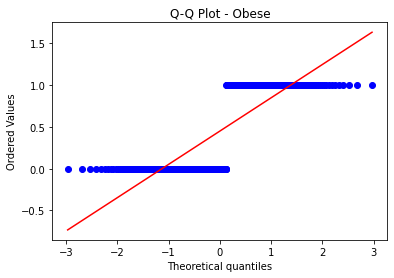

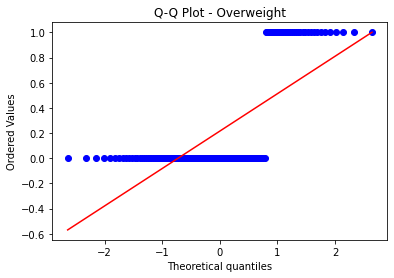

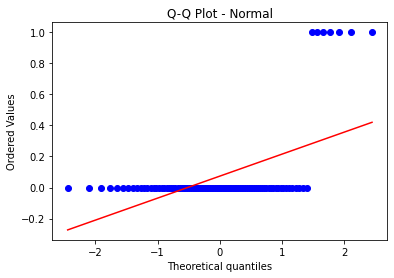

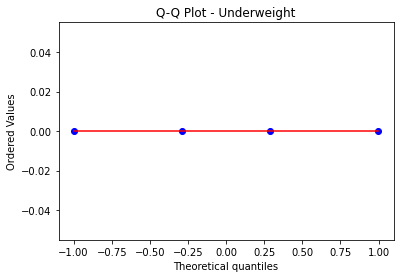

In [75]:
unique_bmi = db_lmdf['BMI'].unique()
for bmi in unique_bmi :
    stats.probplot(db_lmdf[db_lmdf['BMI'] == bmi]['Outcome'], dist="norm", plot=plt)
    plt.title("Q-Q Plot - " +  bmi)
    plt.show()

In [76]:
groups_bmi = []
for bmi in unique_bmi:
  groups_bmi.append(db_lmdf[db_lmdf['BMI']==bmi]['Outcome'])

**Check if the all groups have the same variabce**<br>
From Levene's test, it could be concluded that the variances between all these groups are not equal.


In [77]:
stats.levene(groups_bmi[0],groups_bmi[1], groups_bmi[2], groups_bmi[3])

LeveneResult(statistic=24.790463920628625, pvalue=2.842265073427314e-15)

With the small p-value, the mean Diabetes Outcome between different levels of BMI are significantly different.

In [78]:
res = stat()
res.tukey_hsd(df=db_lmdf, res_var='Outcome', xfac_var='BMI', anova_model='Outcome ~ C(BMI)')
res.tukey_summary

/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1       group2      Diff     Lower     Upper    q-value   p-value
0       Obese   Overweight  0.234213  0.128651  0.339774   8.079997  0.001000
1       Obese       Normal  0.376097  0.244447  0.507748  10.403560  0.001000
2       Obese  Underweight  0.449782 -0.136645  1.036209   2.793142  0.198430
3  Overweight       Normal  0.141885 -0.008183  0.291952   3.443138  0.071714
4  Overweight  Underweight  0.215569 -0.375265  0.806403   1.328697  0.757953
5      Normal  Underweight  0.073684 -0.522364  0.669733   0.450192  0.900000

#### Two-way ANOVA

In [79]:
model_two = ols('Outcome ~ C(BMI) + C(BloodPressure) + C(BMI):C(BloodPressure)', data=db_lmdf).fit()
anova_table = sm.stats.anova_lm(model_two, typ=1)
anova_table

df      sum_sq   mean_sq          F        PR(>F)
C(BMI)                     3.0   15.294550  5.098183  24.870590  2.612460e-15
C(BloodPressure)           4.0    1.589522  0.397380   1.938550  1.022682e-01
C(BMI):C(BloodPressure)   12.0    2.667725  0.222310   1.084502  3.700063e-01
Residual                 710.0  145.541792  0.204988        NaN           NaN

### ANCOVA <br>
**Research Qyestion for ANCOVA:** <br>
Do different levels of Blood Pressure have impact on diabetes outcome given it is covariating with the number of pregnancies?

In [80]:
db_ancova = db_lmdf[['Pregnancies','BloodPressure','Outcome']]
db_ancova.head()

Pregnancies BloodPressure  Outcome
0            6        Normal        1
1            1        Normal        0
2            8        Normal        1
3            1        Normal        0
4            0   Hypotension        1

**Assumption validation of ANCOVA**<br>
* From observation of group standard deviation and conducting Levene's test it is clear that the variances of the depedent variable are similar with one another, there is no violation of hemogeneity of variance.
* Given the dependent variable has only 0 and 1 value, it is not normal distributed.

This dataset violates at least 1 ANCOVA assumptions.


In [81]:
db_ancova.groupby('BloodPressure')['Outcome'].std()

BloodPressure
Hypotension           0.393220
Normal                0.471402
Hypertension1         0.495225
Hypertension2         0.504067
HypertensiveCrisis         NaN
Name: Outcome, dtype: float64

In [82]:
db_ancova.groupby('BloodPressure')['Outcome'].count()

BloodPressure
Hypotension            85
Normal                437
Hypertension1         143
Hypertension2          58
HypertensiveCrisis      1
Name: Outcome, dtype: int64

In [83]:
hyoi_gp = db_ancova[db_ancova['BloodPressure']=='Hypotension']['Outcome']
nor_gp = db_ancova[db_ancova['BloodPressure']=='Normal']['Outcome']
hyper1_gp = db_ancova[db_ancova['BloodPressure']=='Hypertension1']['Outcome']
hyper2_gp = db_ancova[db_ancova['BloodPressure']=='Hypertension2']['Outcome']
hyperc_gp = db_ancova[db_ancova['BloodPressure']=='HypertensiveCrisis']['Outcome']

In [84]:
stats.levene(hyoi_gp,nor_gp, hyper1_gp, hyper2_gp)

LeveneResult(statistic=6.113878311867394, pvalue=0.00041466220629183723)

In [85]:
db_ancova=db_ancova[db_ancova['BloodPressure'] != 'HypertensiveCrisis']

In [86]:
pingouin.ancova(data=db_ancova, dv='Outcome', covar='Pregnancies', between='BloodPressure', effsize='n2')

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)


Source          SS   DF          F         p-unc        n2
0  BloodPressure    3.189204    4   3.749431  1.084700e-02  0.019641
1    Pregnancies    6.504324    1  30.587590  4.471874e-08  0.040058
2       Residual  152.679717  718        NaN           NaN       NaN

In [87]:
pingouin.anova(dv='Outcome', between='BloodPressure', data=db_ancova,
               detailed=True, effsize='n2')

Source          SS   DF        MS         F     p-unc        n2
0  BloodPressure    4.060773    3  1.353591  6.113878  0.000415  0.024875
1         Within  159.184041  719  0.221396       NaN       NaN       NaN

### Power Analysis

**Research Question for Power Analysis** <br>
Does blood pressure differs significantly between groups with or without diabetes

In [88]:
db_df.head()

Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age  \
0            6      148             72  33.6                     0.627   50   
1            1       85             66  26.6                     0.351   31   
2            8      183             64  23.3                     0.672   32   
3            1       89             66  28.1                     0.167   21   
4            0      137             40  43.1                     2.288   33   

    Outcome AgeGroup  
0      Diab      50+  
1  Non-Diab    30-34  
2      Diab    30-34  
3  Non-Diab    21-24  
4      Diab    30-34

In [89]:
dia_bp = db_df[db_df['Outcome']=='Diab']['BloodPressure']
ndia_bp = db_df[db_df['Outcome']=='Non-Diab']['BloodPressure']

In [90]:
nobs1 = len(dia_bp)
ratio = len(ndia_bp)/len(dia_bp)

In [91]:
es = pingouin.compute_effsize(dia_bp, ndia_bp, eftype='cohen')
es

0.35543147626032273

In [92]:
power_dp = statsmodels.stats.power.tt_ind_solve_power(effect_size=es, nobs1 = nobs1, alpha=0.05, ratio=ratio)
power_dp

0.9950152252699767

In [93]:
from statsmodels.stats.power import TTestIndPower

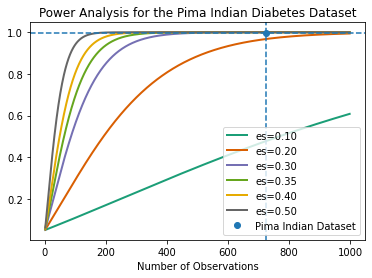

In [94]:
TTestIndPower().plot_power(dep_var='nobs',
                           nobs=np.arange(2,1000),
                           effect_size=np.array([0.1,0.2,0.3,0.35,0.4,0.5]),
                           alpha=0.05
                           )
plt.plot(len(db_df), power_dp, 'o', label='Pima Indian Dataset')
plt.legend()
plt.title('Power Analysis for the Pima Indian Diabetes Dataset')
plt.axhline(y=power_dp, linestyle='--')
plt.axvline(x=len(db_df), linestyle='--')
plt.show()

In [95]:
len(db_df)

724